# Demo Cross-Chirps

In [1]:
import matlab.engine
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean

from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface


import sys
import os

In [2]:
# A test for new methods
# signal parameters
SNRin = 10
N = 2**10

# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_5()
# s = sbank.signal_mc_impulses()
# np.random.seed(0) 
x, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub) 
Sbatsig, Fbatsig= get_spectrogram(x,)


snr_out:10.0


Text(0.5, -17.67732876442075, 'time')

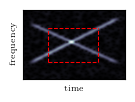

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_w = 1.32
fig_h = .9
fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ax.set_xlim([0,N])
ax.set_ylim([0,N])
ax.plot([250, 250],[250, 750],'r--', linewidth=0.75)
ax.plot([750, 750],[250, 750],'r--', linewidth=0.75)
ax.plot([250, 750],[250, 250],'r--', linewidth=0.75)
ax.plot([250, 750],[750, 750],'r--', linewidth=0.75)
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_spect.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

Text(-19.533341326092692, 0.5, 'frequency')

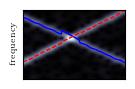

In [4]:
# EM method
from methods.method_EM import NewMethod
em_method = NewMethod().method
ifs_em = em_method(x,[],[],[],[],[],[],[],True)
fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ls = ['--','-']
color = ['r','b']
ord = np.argsort(np.median(ifs_em,axis=1))
[ax.plot(ifs_em[j]*2*N,linewidth=1.0,ls=ls[j],color=color[j]) for j in ord]

ax.set_xlim([250,750])
ax.set_ylim([250,750])
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
ax.set_ylabel('frequency', fontsize=6.0)
# ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_EM.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  


Text(0.5, -17.67732876442075, 'time')

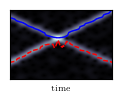

In [5]:
# Nils method
from methods.method_MB_RD import NewMethod
n_method = NewMethod().method
ifs_nm = n_method(x,[], [], [], [], [], [], True)
fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ord = np.argsort(np.median(ifs_nm,axis=1))
[ax.plot(ifs_nm[j]*2*N,linewidth=1.0,ls=ls[j],color=color[j]) for j in ord]

ax.set_xlim([250,750])
ax.set_ylim([250,750])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)
                
# fig.savefig('batsig_nils.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

Text(0.5, -17.67732876442075, 'time')

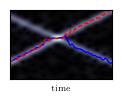

In [6]:
# PB method without SST
from methods.method_PB import NewMethod
pb_method = NewMethod().method
ifs_pb = pb_method(x, [], True, [], [], [], [], [], [], [], [], [],True)
fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ord = np.argsort(np.median(ifs_pb,axis=1))
[ax.plot(ifs_pb[j]*2*N,linewidth=1.0,ls=ls[j],color=color[j]) for j in ord]

ax.set_xlim([250,750])
ax.set_ylim([250,750])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_PB.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

Text(0.5, -17.67732876442075, 'time')

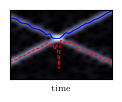

In [7]:
# FRI method with 
from methods.method_FRI import NewMethod
fri_method = NewMethod().method
ifs_fri = fri_method(x,[],[],[],[],[],[],[],True)
fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ord = np.argsort(np.median(ifs_fri,axis=1))
[ax.plot(ifs_fri[j]*2*N,linewidth=0.75,ls=ls[j],color=color[j]) for j in ord]

ax.set_xlim([250,750])
ax.set_ylim([250,750])
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_EM.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  


Text(0.5, -17.67732876442075, 'time')

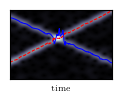

In [8]:
# Brevdo
from methods.method_brevdo import NewMethod
br_method = NewMethod().method
ifs_br = br_method(x,[],[],[],[],[],[],True)

fig, ax = plt.subplots(1,1,figsize=(fig_w,fig_h))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ord = np.argsort(np.median(ifs_br,axis=1))
[ax.plot(ifs_br[j]*2*N,linewidth=0.75,ls=ls[j],color=color[j]) for j in ord]

ax.set_xlim([250,750])
ax.set_ylim([250,750])
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_EM.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

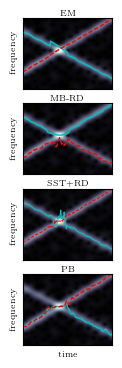

In [9]:
fig_w = 1.15
fig_h = 1.0
fig, ax = plt.subplots(4,1,figsize=(fig_w, 4.25*fig_h))
ax[0].imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
ax[0].set_xlim([0,N])
ax[0].set_ylim([0,N])
ax[0].plot([250, 250],[250, 750],'r--', linewidth=0.75)
ax[0].plot([750, 750],[250, 750],'r--', linewidth=0.75)
ax[0].plot([250, 750],[250, 250],'r--', linewidth=0.75)
ax[0].plot([250, 750],[750, 750],'r--', linewidth=0.75)
# ax.axis('off')
fig.canvas.draw()
ax[0].tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
ax[0].set_ylabel('frequency', fontsize=6.0)
# ax[0].set_xlabel('time', fontsize=6.0)

for a in ax:
    a.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone', aspect='auto')
    a.set_xlim([300,750])
    a.set_ylim([300,750])
    a.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
    a.set_ylabel('frequency', fontsize=6.0)

# EM method
ls = ['--','-']
color = ['r','c']
ord = np.argsort(np.median(ifs_em,axis=1))
[ax[0].plot(ifs_em[j]*2*N,linewidth=1.0,ls=ls[j],color=color[j]) for j in ord]
ax[0].set_title('EM', fontsize=6.0, pad=2)

# Nils method
[ax[1].plot(ifs_nm[j]*2*N,linewidth=1.0,ls=ls[j],color=color[j]) for j in ord]
ax[1].set_title('MB-RD', fontsize=6.0, pad=2)

# FRI method
# [ax[2].plot(ifs_fri[j]*2*N,linewidth=0.75,ls=ls[j],color=color[j]) for j in ord]
[ax[2].plot(ifs_br[j]*2*N,linewidth=0.75,ls=ls[j],color=color[j]) for j in ord]
# ax[2].set_title('FRI', fontsize=6.0, pad=2)
ax[2].set_title('SST+RD', fontsize=6.0, pad=2)

# PB method
[ax[3].plot(ifs_pb[j]*2*N,linewidth=1.0,ls=ls[j],color=color[j]) for j in ord]
ax[3].set_title('PB', fontsize=6.0, pad=2)
ax[3].set_xlabel('time', fontsize=6.0)

fig.savefig('crossing_chirps_ifs.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)